## Application Flow

Before proceeding with the algorithm, let’s first discuss the lifecycle of an unsupervises machine learning model. This diagram explains the creation of an unsupervised Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for an unsupervised machine learning model looks like:

<img src="Images/unsupervised_ApplicationFlow.png" width= "300">

## Clustering

Let’s suppose we give a child different objects to group. How does a child make a group? The child may group over the colour, over the shape, over the hardness or softness of the objects etc. The basic idea here is that the child tries to find out similarities and dissimilarities between different objects and then tries to make a group of similar objects. This is called **clustering**, the method of identifying similar instances and keeping them together.
In Other words, clustering identifies homogeneous subgroups among the observations.


Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data.
A cluster is a collection of objects which are “similar” amongst themselves and are “dissimilar” to the objects belonging to a different cluster.
For example:


<img src="https://summerofhpc.prace-ri.eu/wp-content/uploads/2013/07/k-means_ilustration.png">


In the figure above, we can easily identify 4 different clusters. The clustering criteria here is distance. Whichever points are near to each other are kept in the same cluster and the faraway points belong to a different cluster


#### The Goal of Clustering

The goal of clustering is to determine the intrinsic groups in unlabeled data. The question is: what constitutes a good cluster? It can be shown that there is no absolute “best” criterion for cluster validation. Consequently, it is the user who must supply the criterion for validating the cluster. For example, we might be interested in finding representatives of homogeneous instances for finding the  “natural clusters” and identifying their unknown properties ( like “natural” data types), for finding appropriate groupings or in finding unusual(which are different from all other data) data objects (outlier detection).


### Applications
The scikit-learn book describes the various applications of clustering as follows:

* __For customer segmentation:__ You can cluster your customers based on their purchases,their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

* __For data analysis:__ When analyzing a new dataset, it is often useful to first discover clusters of similar instances, as it is often easier to analyze clusters separately.

* __As a dimensionality reduction technique:__ Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k dimensional. This is typically much lower dimensional than the original feature vector, but it can preserve enough information for further processing.

* __For anomaly detection (also called outlier detection):__ Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.

* __For semi-supervised learning:__ If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This can greatly increase the amount of labels available for a subsequent supervised learning algorithm, and thus improve its performance.
.
* __For search engines:__ For example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image’s cluster using the trained clustering model, and you can then simply return all the images from this cluster.

* __To segment an image:__ By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


##### Main Requirements:
The primary requirements that should be met by a clustering algorithm are:
* It should be scalable
* It should be able to deal with attributes of different types;
* It should be able to discover arbitrary shape clusters;
* It should have an inbuilt ability to deal with noise and outliers;
* The clusters should not vary with the order of input records;
* It should be able to handle data of high dimensions.
* It should be easy to interpret and use.


##### Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: _Agglomerative_ and _Divisive_.

**Agglomerative:** This approach first considers all the points as individual clusters and then finds out the similarity between two points, puts them into a cluster. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive:** It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This continues until there are as many clusters as there are datapoints. This is also called the top-down approach.


### K-Means Clustering

It was proposed by Stuart Lloyd at the Bell Labs in 1957 as a technique for pulse-code modulation,
but it was only published outside of the company in 1982, in a paper titled
_“Least square quantization in PCM”._By then, in 1965, Edward W. Forgy had published
virtually the same algorithm, so K-Means is sometimes referred to as Lloyd-Forgy.


K-Means is a clustering approach in which the data is grouped into K distinct non-overlapping clusters based on their distances from the K centres. The value of **K** needs to be specified first and then the algorithm assigns the points to exactly one cluster.


##### Theory

The theory discussed above can be mathematically expressed as:
* Let C1, C2, Ck be the K clusters
* Then we can write: $C_1 U C_2 UC_3 U…UC_k $={1,2,3,…,n} i.e., each datapoint has been assigned to a cluster.
* Also, 
<img src='Images/non_overlapping.PNG' width='300'>
This means that the clusters are non-overlapping.

* The idea behind the K-Means clustering approach is that the within-cluster variation amongst the point should be minimum. The within-cluster variance is denoted by: W(Ck).Hence, according to the statement above, we need to  minimize this variance for all the clusters. Mathematically it can be written as:
<img src='Images/minimize_ck.PNG' width='300'>

* The next step  is to define the criterion for measuring the within-cluster variance. Generally, the criterion is the Euclidean distance between two data points.
<img src='Images/wck_formula.PNG' width='300'>

* The above formula says that we are calculating the distances between all the point in a cluster, then we are repeating it for all the K clusters(That’s why two summation signs) and then we are dividing it by the number of observation in the clusters (Ck is the number of observations in the Kth cluster) to calculate the average.

So, ultimately our goal is to minimize:

<img src='Images/final_ck.PNG' width='300'>

The following algorithm steps are used to solve this problem

#### Algorithm:
1. Randomly assign K centres.
2. Calculate the distance of all the points from all the K centres and allocate the points to cluster based on the shortest distance. The model’s _inertia_ is the mean squared distance between each instance and its closest centroid. The goal is to have a model with the lowes intertia.
3. Once all the points are assigned to clusters, recompute the centroids.
4. Repeat the steps 2 and 3 until the locations of the centroids stop changing and the cluster allocation of the points becomes constant.

#### Python Explanation:

In [4]:
# Doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


Consider a collection of points that are sampled from three different densities,
in this case normal densities with the same covariances but different means.

In [5]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

Here is a scatterplot of this data.

We clearly see three _clusters_, corresponding to the three _mixture components_.
How can we recover these clusters?

This is the job of _clustering algorithms_.

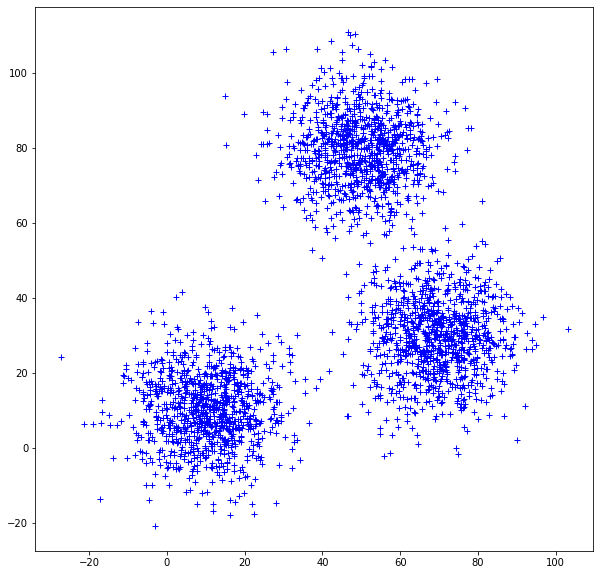

In [6]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

Mixture densities arise in both unsupervised learning and in supervised learning.
In both cases, they commonly represent a problem structure in which data is
generated from a number of ideal prototypes (the cluster centres) but then
corrupted by noise.

- When each cluster has a distinct class label, we have a regular classification
problem with normal densities.

- When no cluster has any labels, we can hope to recover the underlying
clusters with a clustering algorithm and then assign labels to these clusters.
This is a form of _semi-supervised learning_.

- When there is training data with labels available, often each class is
a mixture of multiple clusters.  That is, each class is generated by multiple
prototypes (think characters in different fonts).

You can perform clustering either at the class level or across all samples and then label each cluster with its
corresponding class label.


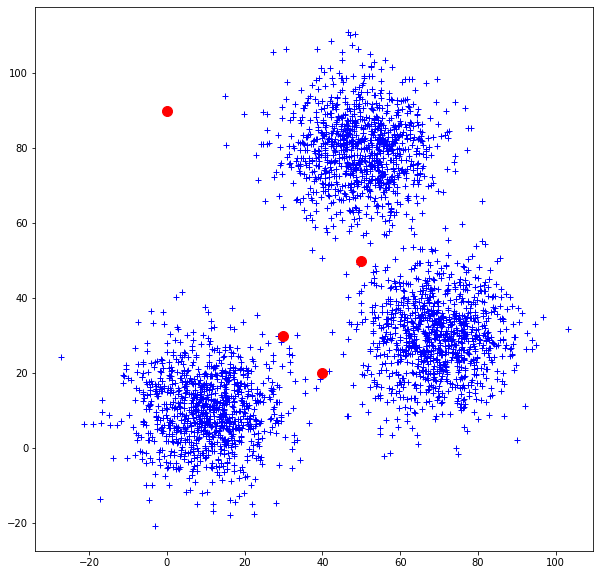

In [7]:
protos = array([[30,30],[40,20],[0,90],[50,50]]) # Initialize centroids
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

Obviously, those centers are wrong, but let's keep going.

Now, we compute the assignment of the data points to the prototypes
(array `closest`).
This is also wrong, but we're going to be using it anyay.

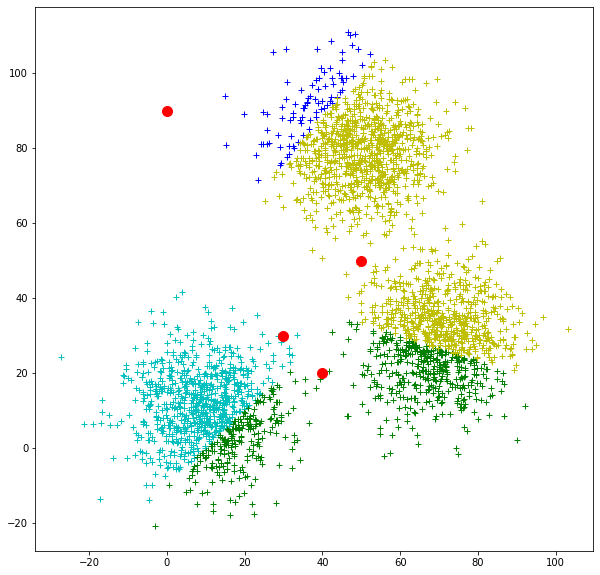

In [8]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [9]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

Now we pretend that the cluster assignments are correct and
recompute the location of the centers.

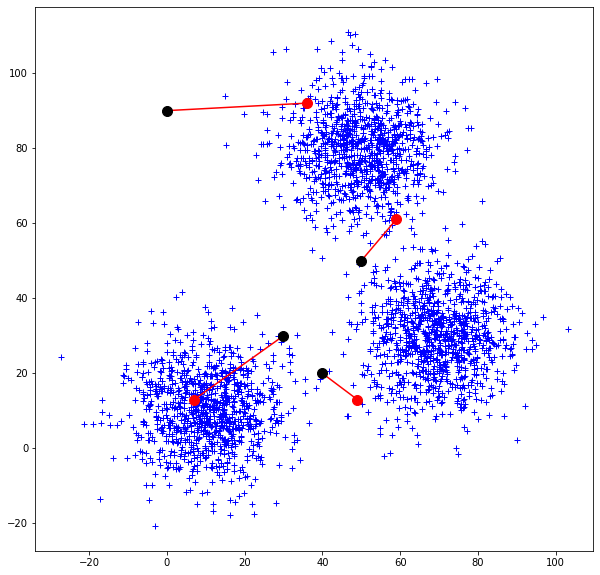

In [10]:
# Plotting the centroid movements
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the centers have moved, and it looks like they have generally
moved in the right direction.

Now let's just repeat this process multiple times

In [11]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

We can now plot the path that the prototype guesses have taken.

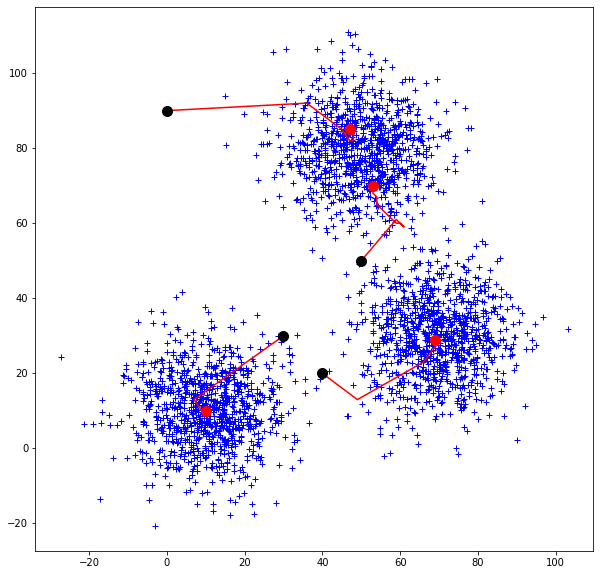

In [12]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the final location of the prototype centers (red) are nicely
in the center of the classes.
The algorithm doesn't give us exactly the cluster centers because there are
three clusters but we postulated four cluster centers.

We can also look at the partition of the data induced by these cluster centers.

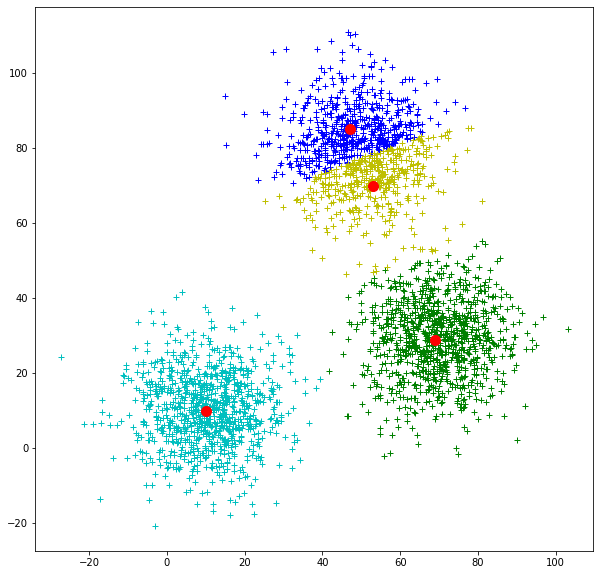

In [13]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

The diagram above shows the step by step implementation of the K-Means algorithm.

As we saw earlier, we need to provide the value of K beforehand. But the question is how to get a good  value of K. An optimum value of K is obtained using the Elbow Method.

###### The Elbow-Method

This method is based on the relationship between the within-cluster sum of squared distances(WCSS Or Inertia) and the number of clusters. It is observed that first with an increase in the number of clusters WCSS decreases steeply and then after a certain number of clusters the drop in WCSS is not that prominent. The point after which the graph between WCSS and the number of clusters becomes comparatively smother is termed as the elbow and the number of cluster at that point are the optimum number of clusters as even after increasing the clusters after that point the variation is not decreasing by much i.e., we have accounted for almost all the dissimilarity in the data. An elbow-curve looks like:

<img src='Images/elbow.PNG' width='500'>


##### An example with actual data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
dataset=pd.read_csv('DataSets/Mall_Customers.csv')

In [16]:
#dataset
X=dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


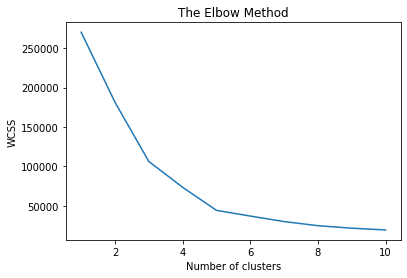

In [17]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [19]:
# It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[3,3]]))
test[0]

2

In [20]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

In [21]:
# Looking at the points which belong to Cluster0
X[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


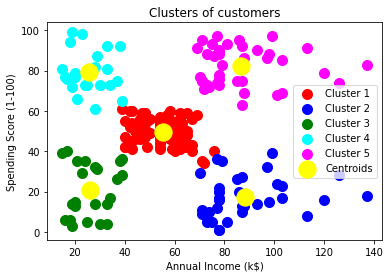

In [22]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Custom Centroid Initialization

If you already know approximately where the centroids should be (e.g., if you ran
another clustering algorithm earlier), then you can set the init hyperparameter to a
NumPy array containing the list of centroids, and set n_init to 1:


###### Challenges and improvements in K-Means:

1.	We need to specify the number of clusters beforehand.
2.	It is required to run the algorithm multiple times to avoid a sub-optimal solution
3.	K-Means does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes.
4.	The clusters sometimes vary based on the initial choice of the centroids. An important improvement to the K-Means algorithm, called **K-Means++**, was proposed in a _2006 paper by David Arthur and Sergei Vassilvitskii_. They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this makes the K-Means algorithm much less likely to converge to a suboptimal solution.
5.	Another important improvement to the K-Means algorithm was proposed in a _2003 paper by Charles Elkan_.It considerably accelerates the algorithm by avoiding many unnecessary distance calculations: this is achieved by exploiting the _triangle inequality_ (i.e., the straight line is always the shortest; in a triangle with sides a,b and c=> **a+b>c**) and by keeping track of lower and upper bounds for distances between instances and centroids. 
6.	Yet another important variant of the K-Means algorithm was proposed in a _2010 paper by David Sculley_. Instead of using the full dataset at each iteration, the algorithm is capable of using **mini-batches**, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the **MiniBatchKMeans** class. You can just use this class like the KMeans class:
